# IGP 5 Models - Feature removal - Male Dataset

In [1]:
# load functions in python file with magic command
%run ../code/model.py

import pandas as pd
output_csv_path = '../output/'

#### Interpretation for next round (reduced feature models)

* `Gradient Boosting`
  * inactiveDay, inactiveLight, activeDark, median, activeNight, kurtosis
  * [0, 1, 2, 3, 6] and [ 2,  3,  1,  0, 10]
* `SVC`
  * inactiveDay, inactiveLight, activeDark, activeNight, q1
  * [0, 1, 2, 3, 7]
* `XGBoost` 
  * inactiveLight, activeDark, activeNight, kurtosis, percentZero
  *  [ 1,  2,  3,  9, 10] and [2, 3, 9, 1, 4]
* `LightGBM`
  * inactiveLight, activeDark, activeNight, kurtosis, q3
  * [ 1,  2,  3,  8, 10] and [ 3, 10,  2,  1,  8]
* `QDA` - inactiveLight, activeDark, median

In [2]:
# read from csv
male_X_train = pd.read_csv(output_csv_path + 'male_X_train.csv')
male_y_train = pd.read_csv(output_csv_path + 'male_y_train.csv').iloc[:, 0]

In [9]:
# print column namees and idx
for i, col_name in enumerate(male_X_train.columns):
    print(f"Col: {col_name}, Colnum: {i}")


Col: inactiveDay, Colnum: 0
Col: activeNight, Colnum: 1
Col: inactiveLight, Colnum: 2
Col: activeDark, Colnum: 3
Col: mean, Colnum: 4
Col: std, Colnum: 5
Col: median, Colnum: 6
Col: q1, Colnum: 7
Col: q3, Colnum: 8
Col: percent_zero, Colnum: 9
Col: kurtosis, Colnum: 10


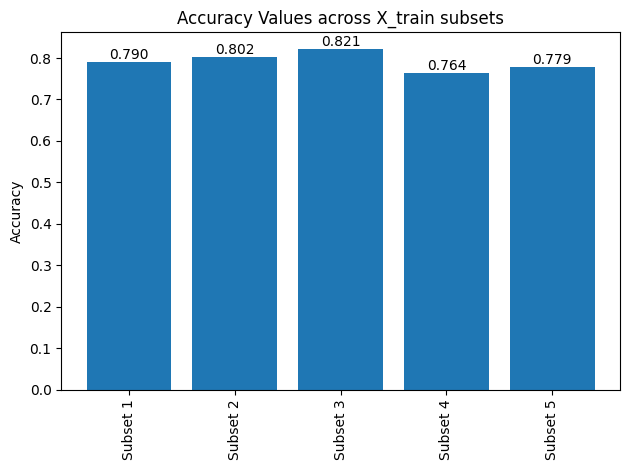

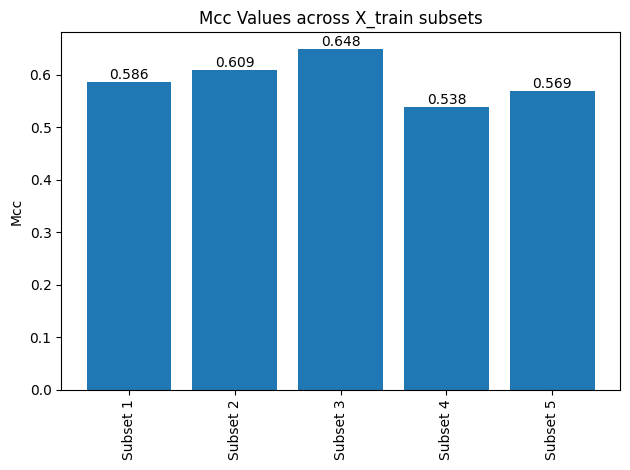

In [51]:
# QDA
qda_col1 = [2,3,4]
qda_col2 = [2,3,5]
qda_col3 = [2,3,6]
qda_col4 = [2,3,9]
qda_col5 = [2,3,10]

qda1 = keep_columns(male_X_train, qda_col1)
qda2 = keep_columns(male_X_train, qda_col2)
qda3 = keep_columns(male_X_train, qda_col3)
qda4 = keep_columns(male_X_train, qda_col4)
qda5 = keep_columns(male_X_train, qda_col5)

qda = [('QDA', QuadraticDiscriminantAnalysis())]

qda1_male = evaluate_models(qda, qda1, male_y_train)
qda2_male = evaluate_models(qda, qda2, male_y_train)
qda3_male = evaluate_models(qda, qda3, male_y_train)
qda4_male = evaluate_models(qda, qda4, male_y_train)
qda5_male = evaluate_models(qda, qda5, male_y_train)

qda_dict = [qda1_male, qda2_male, qda3_male, qda4_male, qda5_male]
plot_metric_dicts(qda_dict, "accuracy")
plot_metric_dicts(qda_dict, "mcc")

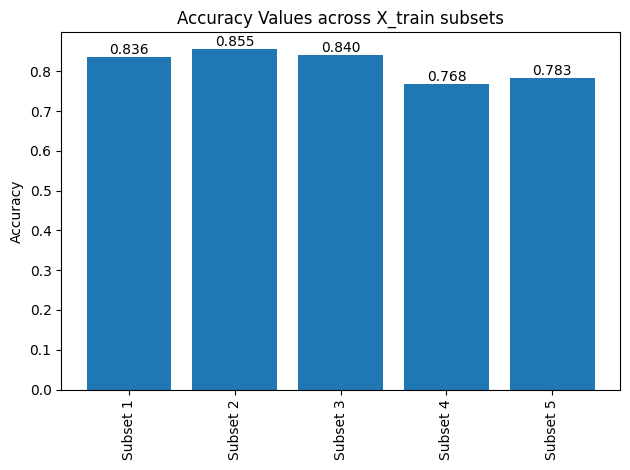

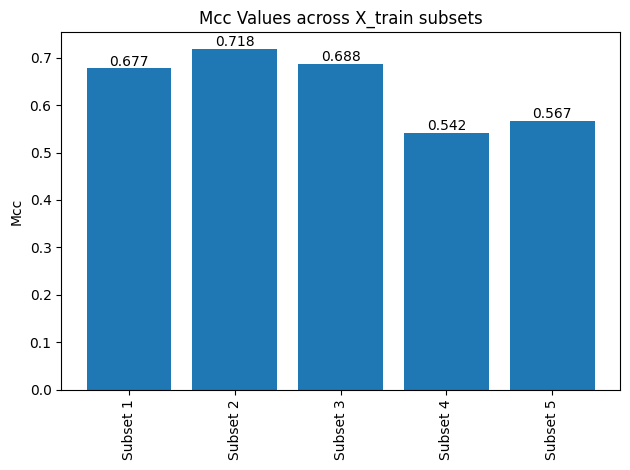

In [45]:
#`LightGBM`
#[ 1,  2,  3,  9, 10] and [2, 3, 9, 1, 4]
lgbm_col1 = [2,3,9,10]
lgbm_col2 = [2,3,9]
lgbm_col3 = [2,3,4,9]
lgbm_col4 = [2,3,4]
lgbm_col5 = [2,3,10]


lgbm1 = keep_columns(male_X_train, lgbm_col1)
lgbm2 = keep_columns(male_X_train, lgbm_col2)
lgbm3 = keep_columns(male_X_train, lgbm_col3)
lgbm4 = keep_columns(male_X_train, lgbm_col4)
lgbm5 = keep_columns(male_X_train, lgbm_col5)

lgbm = [('LightGBM', LGBMClassifier(verbose=-1, random_state=RANDOM_STATE))]

lgbm1_male = evaluate_models(lgbm, lgbm1, male_y_train)
lgbm2_male = evaluate_models(lgbm, lgbm2, male_y_train)
lgbm3_male = evaluate_models(lgbm, lgbm3, male_y_train)
lgbm4_male = evaluate_models(lgbm, lgbm4, male_y_train)
lgbm5_male = evaluate_models(lgbm, lgbm5, male_y_train)

lgbm_dict = [lgbm1_male, lgbm2_male, lgbm3_male, lgbm4_male, lgbm5_male]
plot_metric_dicts(lgbm_dict, "accuracy")
plot_metric_dicts(lgbm_dict, "mcc")

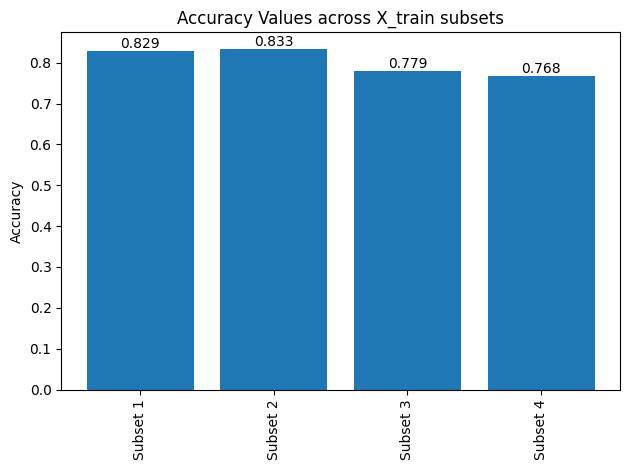

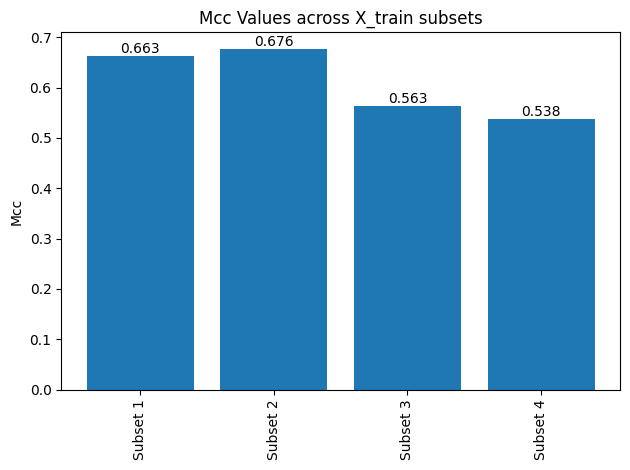

In [46]:
#xgboost
#[ 1,  2,  3,  9, 10] and [2, 3, 9, 1, 4]
xgb_col1 = [2,3,9,10]
xgb_col2 = [2,3,9]
xgb_col3 = [2,3,4,10]
xgb_col4 = [2,3,4]

xgb1 = keep_columns(male_X_train, xgb_col1)
xgb2 = keep_columns(male_X_train, xgb_col2)
xgb3 = keep_columns(male_X_train, xgb_col3)
xgb4 = keep_columns(male_X_train, xgb_col4)

xgb = [('XGBoost', XGBClassifier(random_state=RANDOM_STATE))]

xgb1_male = evaluate_models(xgb, xgb1, male_y_train)
xgb2_male = evaluate_models(xgb, xgb2, male_y_train)
xgb3_male = evaluate_models(xgb, xgb3, male_y_train)
xgb4_male = evaluate_models(xgb, xgb4, male_y_train)

xgb_dict = [xgb1_male, xgb2_male, xgb3_male, xgb4_male]
plot_metric_dicts(xgb_dict, "accuracy")
plot_metric_dicts(xgb_dict, "mcc")

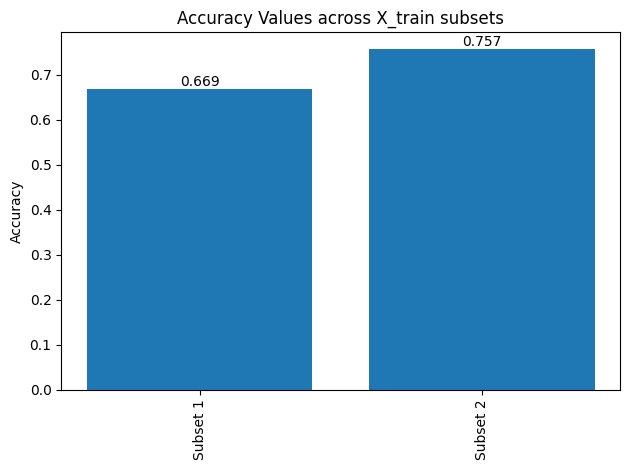

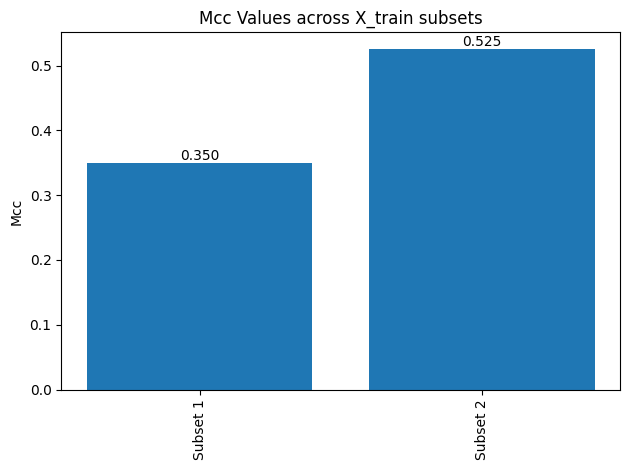

In [47]:
# svc
svc_col1 = [0, 1, 7]
svc_col2 = [2, 3, 7]

svc1 = keep_columns(male_X_train, svc_col1)
svc2 = keep_columns(male_X_train, svc_col2)

svc = [('SVC linear', LinearSVC(dual=False, max_iter=10000, random_state=RANDOM_STATE))]

svc1_male = evaluate_models(svc, svc1, male_y_train)
svc2_male = evaluate_models(svc, svc2, male_y_train)

svc_dict = [svc1_male, svc2_male]
plot_metric_dicts(svc_dict, "accuracy")
plot_metric_dicts(svc_dict, "mcc")

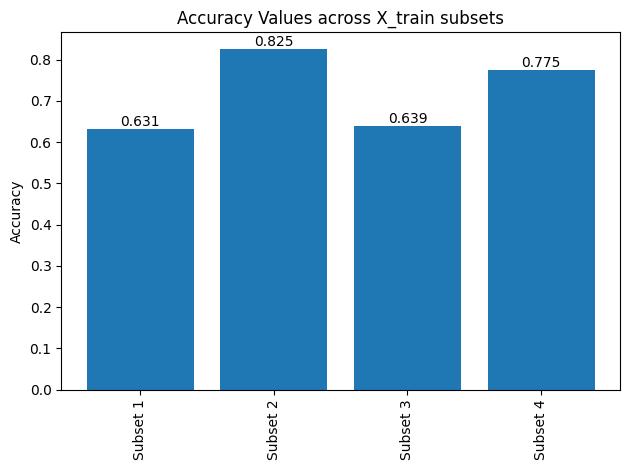

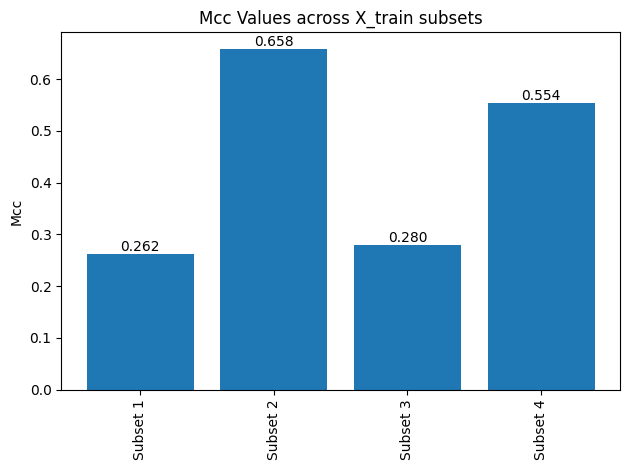

In [50]:
# Gradient Boosting

gb1_col = [0, 1, 6]
gb2_col = [2, 3, 6]
gb3_col = [0, 1, 10]
gb4_col = [2, 3, 10]

gb1 = keep_columns(male_X_train, gb1_col)
gb2 = keep_columns(male_X_train, gb2_col)
gb3 = keep_columns(male_X_train, gb3_col)
gb4 = keep_columns(male_X_train, gb4_col)

gb = [('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE))]

gb1_male = evaluate_models(gb, gb1, male_y_train)
gb2_male = evaluate_models(gb, gb2, male_y_train)
gb3_male = evaluate_models(gb, gb3, male_y_train)
gb4_male = evaluate_models(gb, gb4, male_y_train)

dict_list = [gb1_male, gb2_male, gb3_male, gb4_male]
plot_metric_dicts(dict_list, "accuracy")
plot_metric_dicts(dict_list, "mcc")

## Comparison

**QDA**
* Subset 3 (`inactiveLight`, `activeDark`, `median`)
  * Accuracy = 0.821
  * MCC = 0.648

**LGBM**
* Subset 2 (`inactiveLight`, `activeDark`, `percent_zero`)
  * Accuracy = 0.855
  * MCC = 0.718

**XGBoost**
* Subset 2 (`inactiveLight`, `activeDark`, `percent_zero`)
  * Accuracy = 0.833
  * MCC = 0.676

**SVC**
* Subset 2 (`inactiveLight`, `activeDark`, `q1`)
  * Accuracy = 0.757
  * MCC = 0.525

**Gradient Boosting**
* Subset 2 (`inactiveLight`, `activeDark`, `median`)
  * Accuracy = 0.825
  * MCC = 0.658



## Results

* **LGBM** is going to the final model for hyperparameter tuning.
* Slight drop in accuracy from best out-of-box model with all features (QDA, acc = 0.893, MCC=0.801)
* Features: (`inactiveLight`, `activeDark`, `percent_zero`)